In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

import copy


from sklearn.cluster import Birch
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data.csv')
df.shape

(288, 7)

In [3]:
traindf = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead']].copy()
# traindf.drop(to_drop, inplace=True)
traindf = traindf.to_numpy()
traindf_list = np.split(traindf, 16)

traindf_before =  df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead']].copy()
traindf_before =traindf_before.iloc[:144, :]
traindf_before = traindf_before.to_numpy()
traindf_before_list = np.split(traindf_before, 24)

df1 = df.to_numpy()

data_to_plot = df.iloc[::6, :]
# data_to_plot.head()
data_to_plot = data_to_plot.to_numpy()

data_to_plot_before = df.iloc[:144, :]
data_to_plot_before = data_to_plot_before.to_numpy()

In [7]:

def plot_silhouette_scores(model, test_data, n_clusters_min, n_clusters_max, title):
    """ Plot silhouette scores and return the best number of clusters"""

    if len(model.subcluster_labels_) >= 2:

        silhouette_scores = []

        clusters_range = range(n_clusters_min, n_clusters_max+1)
        results_dict = []
        # print(clusters_range)
        for number in clusters_range:
            # make a copy of the model so as not to mess up the 'correct' model
            model_cpy = copy.deepcopy(model)
            model_cpy.set_params(n_clusters=number)

            model_cpy.partial_fit()
            labels = model_cpy.predict(test_data)
            # print(labels)
            try: 
                s = metrics.silhouette_score(test_data, labels, metric='euclidean')
                silhouette_scores.append(s)
                results_dict.append((number, s))
            except ValueError:
                pass

        silhouette_range = [i[0] for i in results_dict]  
#         plt.plot(silhouette_range[:], silhouette_scores[:])
#         plt.xlabel('Number Of Clusters')
#         plt.ylabel('Silhouette Score')
#         plt.title(title)
# #         plt.savefig(folder + 'silhouette_'+ save_graph_name +'.png')
#         plt.show()
#         plt.close() 
        max_score = max(silhouette_scores)
        print(results_dict)
        for i in results_dict:
            if i[1] == max_score:
                print("The highest silhouette scores(" + str(max_score) + ") is for " + str(i[0]) + " clusers")
                print('\n')
                return int(i[0])
    else:
        print('couldnt get the scores, plz help')
        print('returning number of clusters = ' + str(n_clusters_min))
        print('\n')
#         model_cpy = copy.deepcopy(model)
#         model_cpy.set_params(n_clusters=2)

#         model_cpy.partial_fit()
#         labels = model_cpy.predict(test_data)
#         s = metrics.silhouette_score(test_data, labels, metric='euclidean')
#         print(s)
#         print('\n')
        return n_clusters_min

In [5]:
data_split_modified_z = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead', 'totalCarNumber', 'index']].copy()
# to_drop = [252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,265,266]
# data_split_modified_z.drop(to_drop, inplace=True)
data_split_modified_z = data_split_modified_z.iloc[:144, :]
data_split_modified_z = data_split_modified_z.to_numpy()
data_split_modified_z_12 = np.split(data_split_modified_z, 12)
indexes = [] 

for d in range(len(data_split_modified_z_12)):
    ind = []
    k = len(data_split_modified_z_12[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_12[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_12[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_12[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_12[d] = np.delete(data_split_modified_z_12[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_modified_z_12[d]))))

data_split_modified_z_12 = np.concatenate(data_split_modified_z_12, axis=0)

Outliers detected: 0
Outliers detected: 0
Outliers detected: 0
Outliers detected: 1
Outliers detected: 0
Outliers detected: 0
Outliers detected: 0
Outliers detected: 1
Outliers detected: 0
Outliers detected: 0
Outliers detected: 0
Outliers detected: 0


In [8]:
data_split_modified_z_12_list = np.split(data_split_modified_z_12, 2)

In [12]:
model_01_before = Birch(n_clusters=None, threshold=0.1)

for i in data_split_modified_z_12_list:
    model_01_before.partial_fit(i[:, :-2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_01_before, data_split_modified_z_12[:, :-2], 3, 6, 'threshold 0.1')

model_01_before.set_params(n_clusters = n)
model_01_before.partial_fit()
    
labels_01_before= model_01_before.predict(data_split_modified_z_12[:, :-2])
##########################################################
model_001_before = Birch(n_clusters=None, threshold=0.01)

for i in data_split_modified_z_12_list:
    model_001_before.partial_fit(i[:, :-2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_001_before, data_split_modified_z_12[:, :-2], 3, 6, 'threshold 0.3')

model_001_before.set_params(n_clusters = n)
model_001_before.partial_fit()
    
Labels_001_before = model_001_before.predict(data_split_modified_z_12[:, :-2])

##########################################################
model_005_before = Birch(n_clusters=None, threshold=0.05)

for i in data_split_modified_z_12_list:
    model_005_before.partial_fit(i[:, :-2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_005_before, data_split_modified_z_12[:, :-2], 3, 6, 'threshold 0.05')

model_005_before.set_params(n_clusters = n)
model_005_before.partial_fit()
    
labels_005_before = model_005_before.predict(data_split_modified_z_12[:, :-2])
####################################################################
####################################################################
#$##################################################################

model_02_before = Birch(n_clusters=None, threshold=0.2)

for i in data_split_modified_z_12_list:
    model_02_before.partial_fit(i[:, :-2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_02_before, data_split_modified_z_12[:, :-2], 3, 6, 'threshold 0.2')

model_02_before.set_params(n_clusters = n)
model_02_before.partial_fit()
    
labels_02_before = model_02_before.predict(data_split_modified_z_12[:, :-2])
##########################################################
model_03_before = Birch(n_clusters=None, threshold=0.03)

for i in data_split_modified_z_12_list:
    model_03_before.partial_fit(i[:, :-2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_03_before, data_split_modified_z_12[:, :-2],3, 6, 'threshold 0.3')

model_03_before.set_params(n_clusters = n)
model_03_before.partial_fit()
    
Labels_03_before = model_03_before.predict(data_split_modified_z_12[:, :-2])

##########################################################
model_05_before = Birch(n_clusters=None, threshold=0.5)

for i in data_split_modified_z_12_list:
    model_05_before.partial_fit(i[:, :-2])

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_05_before, data_split_modified_z_12[:, :-2], 3, 6, 'threshold 0.5')

model_05_before.set_params(n_clusters = n)
model_05_before.partial_fit()
    
labels_05_before = model_05_before.predict(data_split_modified_z_12[:, :-2])

[(3, 0.6556031588628115), (4, 0.603594984278065), (5, 0.5159251848968918), (6, 0.46739478991876954)]
The highest silhouette scores(0.6556031588628115) is for 3 clusers


[(3, 0.5856980436981691), (4, 0.603594984278065), (5, 0.5159251848968918), (6, 0.47147646523309233)]
The highest silhouette scores(0.603594984278065) is for 4 clusers


[(3, 0.5856980436981691), (4, 0.603594984278065), (5, 0.48215897682580827), (6, 0.4550514528251643)]
The highest silhouette scores(0.603594984278065) is for 4 clusers


[(3, 0.6510807131470906), (4, 0.6010317246593814), (5, 0.48809681859575343), (6, 0.48809681859575343)]
The highest silhouette scores(0.6510807131470906) is for 3 clusers


[(3, 0.622263755921512), (4, 0.6054697191064278), (5, 0.4696344061546444), (6, 0.41411437934338313)]
The highest silhouette scores(0.622263755921512) is for 3 clusers


couldnt get the scores, plz help
returning number of clusters = 3




/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (5) by Birch is less than (6). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/marta/env/lib/python3.6/site-packages/scikit_learn-0.22.2.post1-py3.6-linux-x86_64.egg/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (3). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


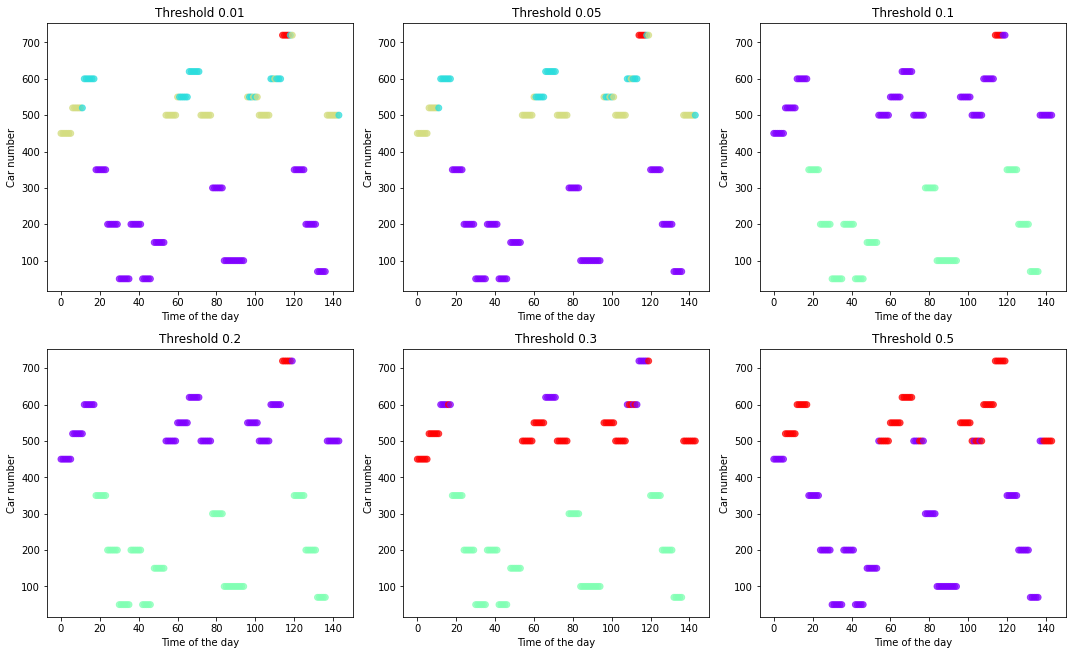

In [13]:
figure, axs = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
axs[0,0].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=Labels_001_before, cmap='rainbow', alpha=0.7)  
axs[0,0].set_xlabel('Time of the day')
axs[0,0].set_ylabel('Car number')
axs[0,0].title.set_text("Threshold 0.01")

axs[0,1].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_005_before, cmap='rainbow', alpha=0.7)  
axs[0,1].set_xlabel('Time of the day')
axs[0,1].set_ylabel('Car number')
axs[0,1].title.set_text("Threshold 0.05")

axs[0,2].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_01_before, cmap='rainbow', alpha=0.7)  
axs[0,2].set_xlabel('Time of the day')
axs[0,2].set_ylabel('Car number')
axs[0,2].title.set_text("Threshold 0.1")

axs[1,0].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_02_before, cmap='rainbow', alpha=0.7)  
axs[1,0].set_xlabel('Time of the day')
axs[1,0].set_ylabel('Car number')
axs[1,0].title.set_text("Threshold 0.2")

axs[1,1].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=Labels_03_before, cmap='rainbow', alpha=0.7)  
axs[1,1].set_xlabel('Time of the day')
axs[1,1].set_ylabel('Car number')
axs[1,1].title.set_text("Threshold 0.3")

axs[1,2].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_05_before, cmap='rainbow', alpha=0.7)  
axs[1,2].set_xlabel('Time of the day')
axs[1,2].set_ylabel('Car number')
axs[1,2].title.set_text("Threshold 0.5")

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
# figure.suptitle('Test of different Thresholds of BIRCH model', fontsize=20)

In [8]:
model_02_whole = Birch(n_clusters=None, threshold=0.2)

for i in traindf_list:
    model_02_whole.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_02_whole, traindf, 2, 6, 'threshold 0.2')

model_02_whole.set_params(n_clusters = n)
model_02_whole.partial_fit()
    
labels_02_whole = model_02_whole.predict(data_to_plot[:, 3:])
##########################################################
model_01_whole = Birch(n_clusters=None, threshold=0.1)

for i in traindf_list:
    model_01_whole.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_01_whole, traindf, 2, 6, 'threshold 0.1')

model_01_whole.set_params(n_clusters = n)
model_01_whole.partial_fit()
    
labels_01_whole = model_01_whole.predict(data_to_plot[:, 3:])
##########################################################
model_001_whole = Birch(n_clusters=None, threshold=0.01)

for i in traindf_list:
    model_001_whole.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_001_whole, traindf, 2, 6, 'threshold 0.3')

model_001_whole.set_params(n_clusters = n)
model_001_whole.partial_fit()
    
labels_001_whole = model_001_whole.predict(data_to_plot[:, 3:])

##########################################################
model_005_whole = Birch(n_clusters=None, threshold=0.05)

for i in traindf_list:
    model_005_whole.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_005_whole, traindf, 2, 6, 'threshold 0.05')

model_005_whole.set_params(n_clusters = n)
model_005_whole.partial_fit()
    
labels_005_whole = model_005_whole.predict(data_to_plot[:, 3:])

################################################################################################################################
model_02= Birch(n_clusters=None, threshold=0.2)

for i in traindf_list:
    model_02.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_02, traindf, 3, 6, 'threshold 0.2 - 3')

model_02.set_params(n_clusters = n)
model_02.partial_fit()
    
labels_02 = model_02.predict(data_to_plot[:, 3:])
##########################################################
model_01 = Birch(n_clusters=None, threshold=0.1)

for i in traindf_list:
    model_01.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_01, traindf, 3, 6, 'threshold 0.1')

model_01.set_params(n_clusters = n)
model_01.partial_fit()
    
labels_01 = model_01.predict(data_to_plot[:, 3:])
##########################################################
model_03 = Birch(n_clusters=None, threshold=0.01)

for i in traindf_list:
    model_03.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_03, traindf, 3, 6, 'threshold 0.01')

model_03.set_params(n_clusters = n)
model_03.partial_fit()
    
labels_03 = model_03.predict(data_to_plot[:, 3:])

##########################################################
model_005 = Birch(n_clusters=None, threshold=0.05)

for i in traindf_list:
    model_005.partial_fit(i)

# model.partial_fit(test_normal)

n = plot_silhouette_scores(model_005, traindf,3, 6, 'threshold 0.05')

model_005.set_params(n_clusters = n)
model_005.partial_fit()
    
labels_005 = model_005.predict(data_to_plot[:, 3:])

[(2, 0.8236081193912895), (3, 0.8325094335704368), (4, 0.8224624519081438), (5, 0.7077265871449145), (6, 0.7237223422133505)]
The highest silhouette scores(0.8325094335704368) is for 3 clusers


[(2, 0.8156353344393873), (3, 0.8245212383086978), (4, 0.8137910395391414), (5, 0.7130811693938863), (6, 0.7249558447103926)]
The highest silhouette scores(0.8245212383086978) is for 3 clusers


[(2, 0.8156353344393873), (3, 0.8245212383086978), (4, 0.8137910395391414), (5, 0.7130811693938863), (6, 0.7249558447103926)]
The highest silhouette scores(0.8245212383086978) is for 3 clusers


[(2, 0.8156353344393873), (3, 0.8245212383086978), (4, 0.8137910395391414), (5, 0.7130811693938863), (6, 0.7249558447103926)]
The highest silhouette scores(0.8245212383086978) is for 3 clusers


[(3, 0.8325094335704368), (4, 0.8224624519081438), (5, 0.7077265871449145), (6, 0.7237223422133505)]
The highest silhouette scores(0.8325094335704368) is for 3 clusers


[(3, 0.8245212383086978), (4, 0.8137910395391414),

Text(0.5, 0.98, 'Test of different Thresholds of BIRCH model')

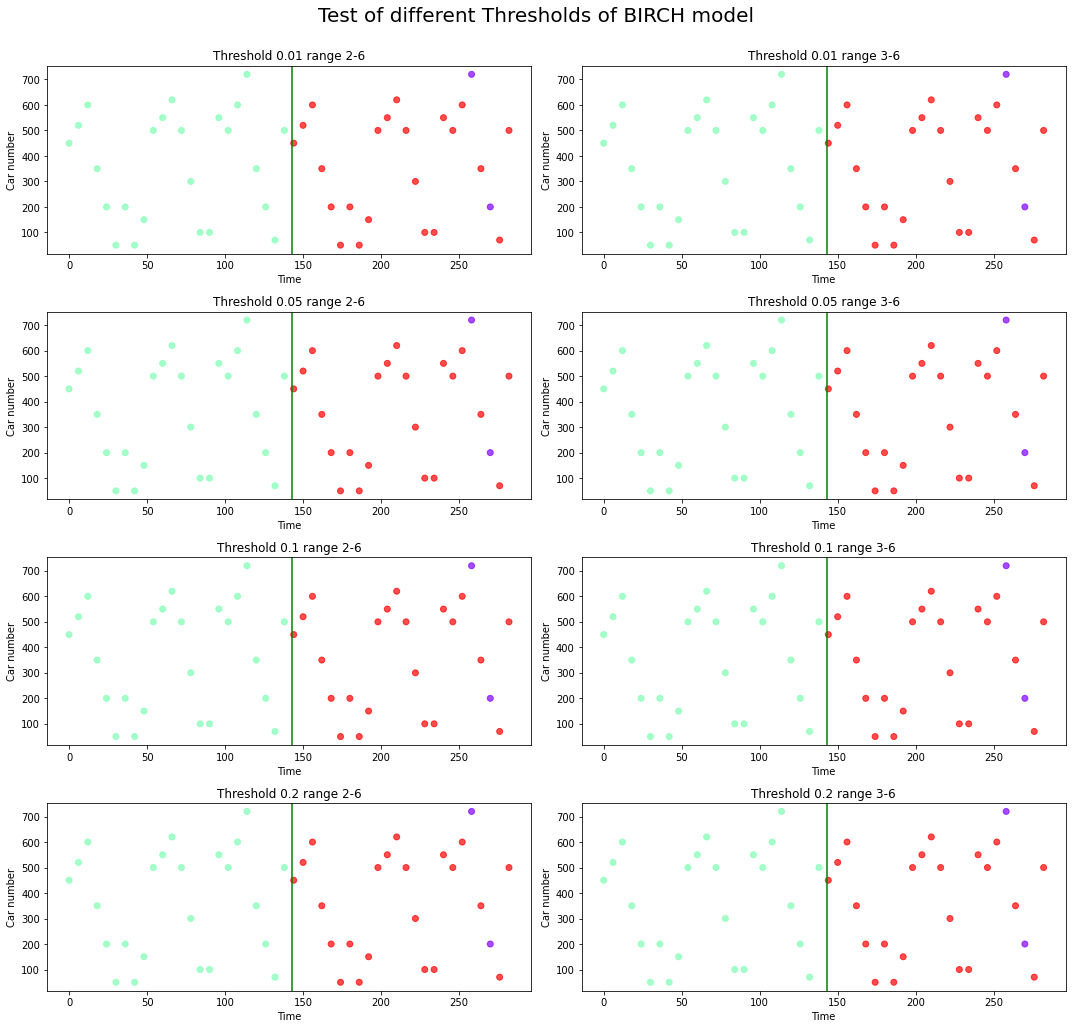

In [9]:
figure, axs = plt.subplots(nrows=4, ncols=2,figsize=(15,15))

axs[0,0].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_01_whole, cmap='rainbow', alpha=0.7)   
axs[0,0].axvline(x=143, color='g')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('Car number')
axs[0,0].title.set_text("Threshold 0.01 range 2-6")

axs[0,1].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_03, cmap='rainbow', alpha=0.7)   
axs[0,1].axvline(x=143, color='g')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylabel('Car number')
axs[0,1].title.set_text("Threshold 0.01 range 3-6")

#########################
axs[1,0].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_005_whole, cmap='rainbow', alpha=0.7)  
axs[1,0].axvline(x=143, color='g')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylabel('Car number')
axs[1,0].title.set_text("Threshold 0.05 range 2-6")

axs[1,1].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_005, cmap='rainbow', alpha=0.7)  
axs[1,1].axvline(x=143, color='g')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylabel('Car number')
axs[1,1].title.set_text("Threshold 0.05 range 3-6")

################################
axs[2,0].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_01_whole, cmap='rainbow', alpha=0.7)  
axs[2,0].axvline(x=143, color='g')
axs[2,0].set_xlabel('Time')
axs[2,0].set_ylabel('Car number')
axs[2,0].title.set_text("Threshold 0.1 range 2-6")

axs[2,1].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_01, cmap='rainbow', alpha=0.7)  
axs[2,1].axvline(x=143, color='g')
axs[2,1].set_xlabel('Time')
axs[2,1].set_ylabel('Car number')
axs[2,1].title.set_text("Threshold 0.1 range 3-6")

##################################################

axs[3,0].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_02_whole, cmap='rainbow', alpha=0.7)  
axs[3,0].axvline(x=143, color='g')
axs[3,0].set_xlabel('Time')
axs[3,0].set_ylabel('Car number')
axs[3,0].title.set_text("Threshold 0.2 range 2-6")

axs[3,1].scatter(data_to_plot[:,0], data_to_plot[:,1], c=labels_02, cmap='rainbow', alpha=0.7)   
axs[3,1].axvline(x=143, color='g')
axs[3,1].set_xlabel('Time')
axs[3,1].set_ylabel('Car number')
axs[3,1].title.set_text("Threshold 0.2 range 3-6")



figure.tight_layout(rect=[0, 0.03, 1, 0.95])
figure.suptitle('Test of different Thresholds of BIRCH model', fontsize=20)

In [7]:
traindf_before_list = np.split(data_split_modified_z_12, 2)


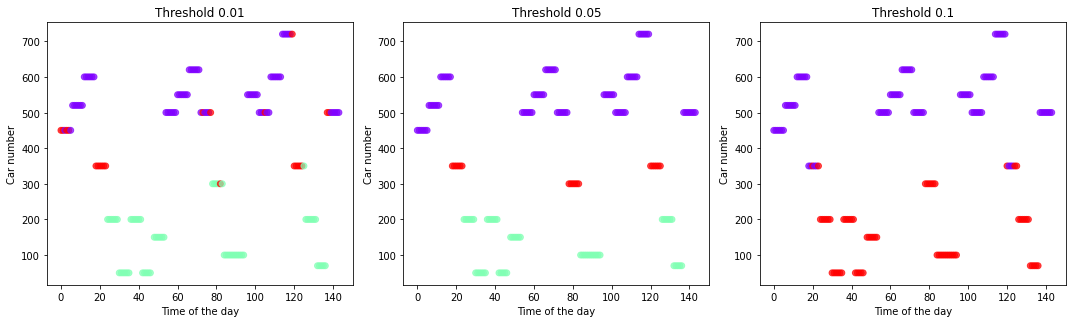

In [17]:
pca = PCA(n_components=2)
# pc_before = pca.fit_transform(df1[:, 3:])
pc_outliers = pca.fit_transform(data_split_modified_z_12[:, :-2])

figure, axs = plt.subplots(nrows=1, ncols=3,figsize=(15,5))

axs[0].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=Labels_001_whole_3, cmap='rainbow', alpha=0.7)  
# axs[0,1].axvline(x=143, color='r')
axs[0].set_xlabel('Time of the day')
axs[0].set_ylabel('Car number')
axs[0].title.set_text("Threshold 0.01")

axs[1].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_005_whole_3, cmap='rainbow', alpha=0.7)  
# axs[0,1].axvline(x=143, color='r')
axs[1].set_xlabel('Time of the day')
axs[1].set_ylabel('Car number')
axs[1].title.set_text("Threshold 0.05")

axs[2].scatter(data_split_modified_z_12[:,5], data_split_modified_z_12[:,4], c=labels_01_whole_3, cmap='rainbow', alpha=0.7)  
# axs[0,1].axvline(x=143, color='r')
axs[2].set_xlabel('Time of the day')
axs[2].set_ylabel('Car number')
axs[2].title.set_text("Threshold 0.1")

figure.tight_layout(rect=[0, 0.03, 1, 0.95])

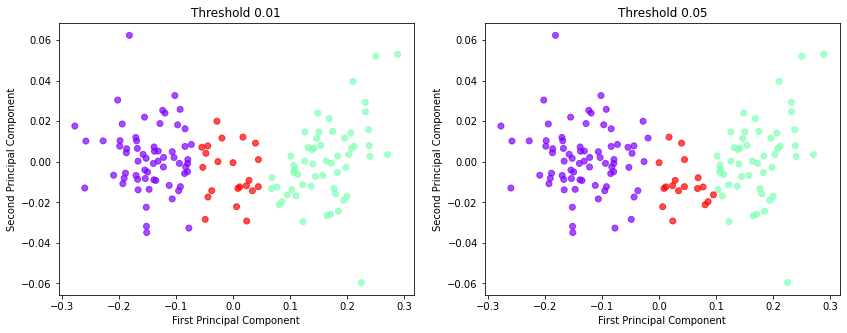

In [18]:
pca = PCA(n_components=2)
# pc_before = pca.fit_transform(df1[:, 3:])
pc_whole_new = pca.fit_transform(data_split_modified_z_12[:, :2])


figure, axs = plt.subplots(nrows=1, ncols=2,figsize=(14,5))
axs[0].scatter(pc_whole_new[:,0], pc_whole_new[:,1], c=Labels_001_whole_3, cmap='rainbow', alpha=0.7)  
axs[0].set_xlabel('First Principal Component')
axs[0].set_ylabel('Second Principal Component')
axs[0].title.set_text("Threshold 0.01")

axs[1].scatter(pc_whole_new[:,0], pc_whole_new[:,1], c=labels_005_whole_3, cmap='rainbow', alpha=0.7)  
axs[1].set_xlabel('First Principal Component')
axs[1].set_ylabel('Second Principal Component')
axs[1].title.set_text("Threshold 0.05")